In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df_MODEL = pd.read_excel('dataset1/MODEL.xlsx', header=[0, 1], index_col=[0, 1])
df_FLOWS = pd.read_excel('dataset1/FLOWS.xlsx', header=[0, 1], index_col=[0, 1])
df_CHARACTERIZATION = pd.read_excel('dataset1/CHARACTERIZATION.xlsx', header=[0, 1], index_col=[0, 1])


MODEL = np.array(df_MODEL)
MODEL[np.isnan(MODEL)] = 0
FLOWS = np.array(df_FLOWS)
CHARACTERIZATION = np.array(df_CHARACTERIZATION)


# Custom color map
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
custom_colors = np.array([[0,0,120,255],[30,144,230,255],[0,0,200,255],[100,149,237,255],[0,0,255,255],[70,130,180,255],                  # Production
                 [255,80,0,255],[255,140,0,255],[255,140,0,255],                                                                          # Transport
                 [0,128,0,255],[0,128,0,255],                                                                                             # Utilisation
                 [240,0,0,255],[139,0,0,255],[250,128,114,255],[220,20,60,255],[178,34,34,255],[205,92,92,255],[240,128,128,255]])/255    # Fin de vie
custom_cmp = ListedColormap(custom_colors)

print("\nImportation OK !")


Importation OK !


Taille de la matrice MODEL : (2, 2)
Taille de la matrice FLOWS : (2, 10)
Taille de la matrice CHARACTERIZATION : (10, 16)
RESULTATS:
322.18	kg CO2 eq	Climate change
0.00	kg CFC11 eq	Ozone depletion
0.00	kBq U-235 eq	Ionising radiation
11.56	kg NMVOC eq	Photochemical ozone formation
0.00	disease inc.	Particulate matter
0.00	CTUh		Human toxicity, non-cancer
0.00	CTUh		Human toxicity, cancer
125.15	mol H+ eq	Acidification
0.00	kg P eq		Eutrophication, freshwater
0.88	kg N eq		Eutrophication, marine
28.30	mol N eq	Eutrophication, terrestrial
219.80	CTUe		Ecotoxicity, freshwater
0.00	Pt		Land use
0.00	m3 depriv.	Water use
0.00	MJ		Resource use, fossils
0.00	kg Sb eq	Resource use, minerals and metals



C:\Users\roeke\AppData\Local\Temp\ipykernel_13092\2120204577.py:21: RuntimeWarning: invalid value encountered in divide
  df_IMPACTS = pd.DataFrame(100*IMPACTS.T/np.sum(IMPACTS,axis=0)[:,None],columns=np.array(df_MODEL.index.get_level_values(0)),index=df_CHARACTERIZATION.columns.get_level_values(0))


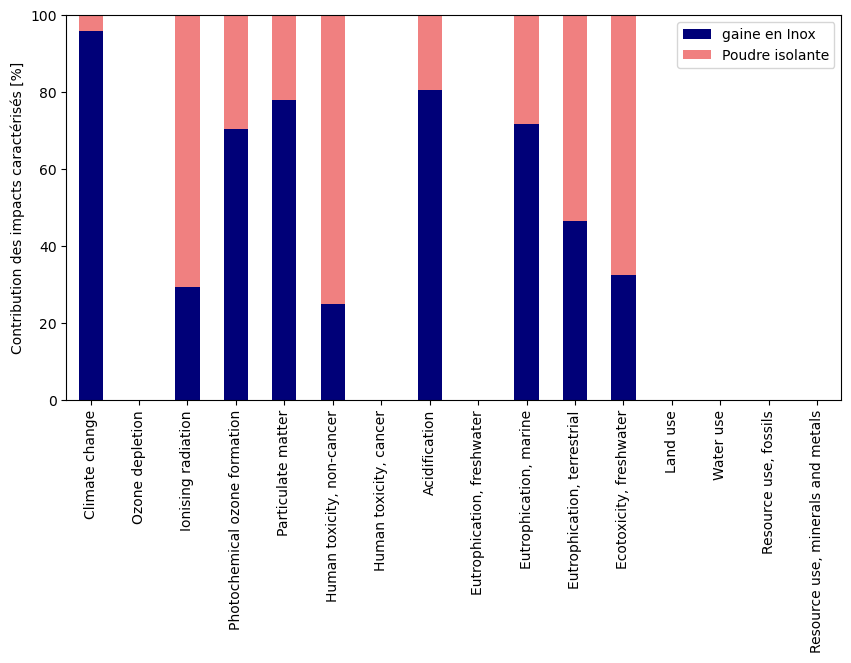

In [3]:
## Quantités des procédés d'avant-plan dans le scénario de base
FOREGROUND = np.array([0.5,0.2])

## Caractérisation des impacts
print("Taille de la matrice MODEL :", MODEL.shape)
print("Taille de la matrice FLOWS :", FLOWS.shape)
print("Taille de la matrice CHARACTERIZATION :", CHARACTERIZATION.shape)
IMPACTS = np.diag(FOREGROUND) @ MODEL @ FLOWS @ CHARACTERIZATION

## Affichage des valeurs absolues des impacts caractérisés
impacts_sum = np.sum(IMPACTS,axis=0)
impacts_text = ["%.2f" % x for x in impacts_sum]
impacts_unit = np.array(df_CHARACTERIZATION.columns.get_level_values(1), dtype='U')
impacts_name = np.array(df_CHARACTERIZATION.columns.get_level_values(0), dtype='U')
tabs = np.array(['\t','\t','\t','\t','\t','\t\t','\t\t','\t','\t\t','\t\t','\t','\t\t','\t\t','\t','\t\t','\t'])
D = np.char.add(np.char.add(np.char.add(np.char.add(np.char.add(impacts_text,'\t'),impacts_unit),tabs),impacts_name),'\n')
print('RESULTATS:')
print(''.join(D.tolist()))

## Graphe de contribution des impacts caractérisés
df_IMPACTS = pd.DataFrame(100*IMPACTS.T/np.sum(IMPACTS,axis=0)[:,None],columns=np.array(df_MODEL.index.get_level_values(0)),index=df_CHARACTERIZATION.columns.get_level_values(0))
df_IMPACTS.plot(kind='bar', stacked=True, figsize=(10, 5), cmap=custom_cmp)
plt.ylim(0,100)
plt.ylabel('Contribution des impacts caractérisés [%]')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()